# Working with data 2017. Class 8
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 1. Clustering
## 2. Data imputation
## 3. Dimensionality reduction

In [14]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats

import statsmodels.formula.api as smf

# 1. Clustering

In [15]:
#Som elibraries
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans

In [16]:
#Read teh data, dropna, get sample
df = pd.read_csv("data/big3_position.csv",sep="\t").dropna()
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])
df = df.replace([np.inf,-np.inf],np.nan).dropna().sample(300)
df.head(2)

Company_name   Company_ID  Big3Share  Position   Revenue  \
3626        SUMMIT STATE BANK  US942878925       0.45         8  4.295545   
2252  TIMKENSTEEL CORPORATION  US464024951      18.11         1  6.043834   

        Assets  Employees  MarketCap                        Exchange  \
3626  5.710426   1.812913   4.817658          NASDAQ National Market   
2252  6.057590   3.414973   5.603227  New York Stock Exchange (NYSE)   

                 TypeEnt  
3626                Bank  
2252  Industrial company

In [60]:
#Scale variables to give all of them the same weight
X = df.loc[:,["Revenue","Assets","Employees","MarketCap"]]
X = preprocessing.scale(X)
print(X.sum(0))
print(X.std(0))
X

[ -1.11910481e-13   1.85934601e-13   2.19824159e-14   2.79554158e-13]
[ 1.  1.  1.  1.]


array([[-0.36876713, -0.68220535,  0.26763352, -0.80639115],
       [-0.36325862, -0.49958626, -0.50401999,  0.04420174],
       [-0.59109167,  0.53105902, -0.3752977 , -0.48330142],
       ..., 
       [ 0.51807468, -0.21091708,  0.77356348,  0.14753705],
       [ 1.07606207,  1.14466777,  0.6561359 ,  1.11508633],
       [ 0.85340652,  0.21902024,  1.55356623,  0.58284111]])

# 1a. Clustering with K-means 
- k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
- Other methods: http://scikit-learn.org/stable/modules/clustering.html


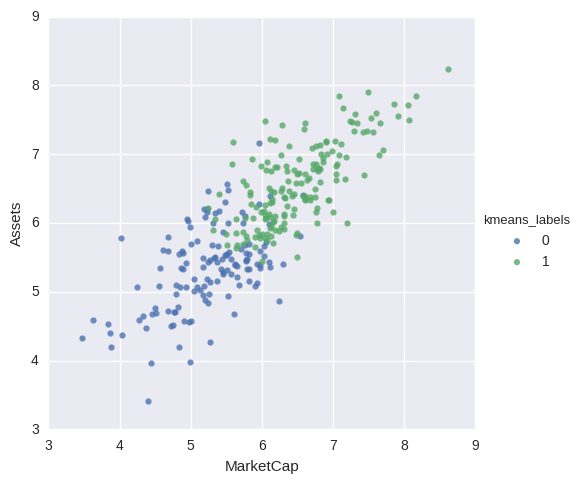

In [69]:
#Get labels of each row and add a new column with the labels
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
df["kmeans_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="kmeans_labels",fit_reg=False,data=df)

# 1b. Clustering with DBSCAN
- The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as oppos

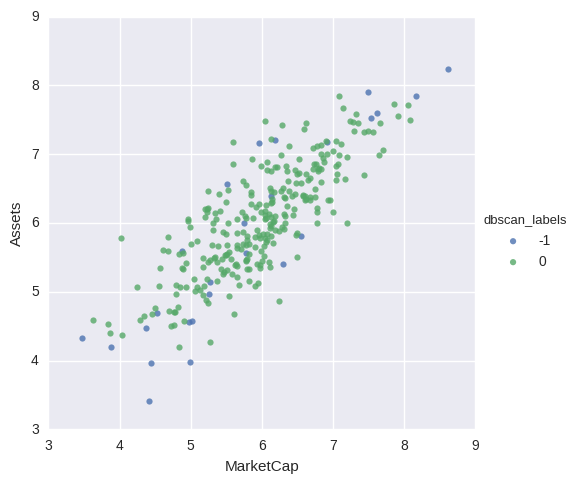

In [66]:
#Get labels of each row and add a new column with the labels
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_
df["dbscan_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="dbscan_labels",fit_reg=False,data=df)

In [70]:
Image(url="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png")

# 1c. Hierarchical clustering
- Keeps aggreagating from a point

[[   0.          150.3373409   120.10595294  155.10171976]
 [ 150.3373409     0.          193.3547258   140.18218283]
 [ 120.10595294  193.3547258     0.          190.80318619]
 [ 155.10171976  140.18218283  190.80318619    0.        ]]


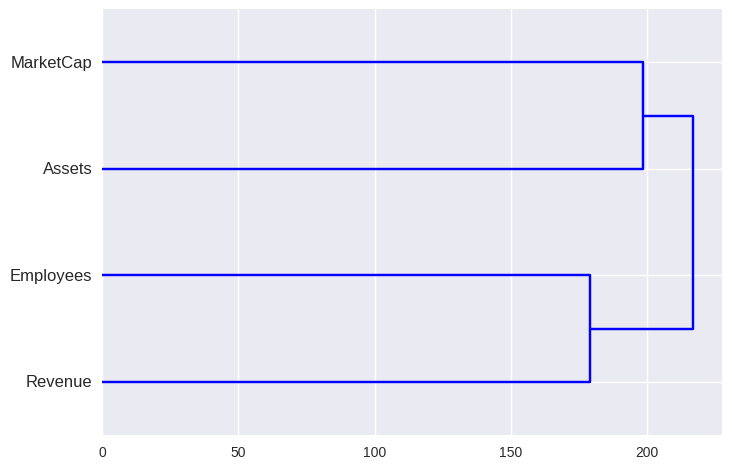

In [78]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate distance matrix based on the difference between rows
D = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        D[i,j] = np.sum(np.abs(X[:,i]-X[:,j])) #Euclidean distance or mutual information are also common
        
print(D)

#Create the linkage and plot
Y = sch.linkage(D, method='centroid') #many methods, single, complete...
Z1 = sch.dendrogram(Y, orientation='right',labels=["Revenue","Assets","Employees","MarketCap"])


# 2. Imputation of missing data (fancy)

In [ ]:
#Required libraries
!conda install tensorflow -y
!pip install fancyimpute
!pip install pydot_ng

In [17]:
import sklearn.preprocessing
import sklearn


In [25]:
#Read the data again but do not 
df = pd.read_csv("data/big3_position.csv",sep="\t")
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])


le = sklearn.preprocessing.LabelEncoder()
labels = le.fit_transform(df["TypeEnt"])
df["TypeEnt_int"] = labels

print(le.classes_)

df = df.replace([np.inf,-np.inf],np.nan).sample(300)
df.head(2)

['Bank' 'Financial company' 'Foundation/Research institute'
 'Industrial company' 'Insurance company' 'Venture capital']


Company_name   Company_ID  Big3Share  Position  \
1026  UNIVEST CORPORATION OF PENNSYLVANIA  US231886144      10.61         1   
3438                 ENGLOBAL CORPORATION  US880322261       0.00       113   

       Revenue    Assets  Employees  MarketCap                Exchange  \
1026  5.051153       NaN   2.875061   5.597535  NASDAQ National Market   
3438  4.900940  4.717671        NaN   4.486005  NASDAQ National Market   

                 TypeEnt  TypeEnt_int  
1026                Bank            0  
3438  Industrial company            3

In [19]:
X = df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]].values
X

array([[ 5.74249575,  5.88061583,  3.15411953,  5.8793964 ,  3.        ],
       [ 3.02036128,  4.3200008 ,         nan,  4.50479697,  3.        ],
       [        nan,  4.67925523,  1.43136376,  4.33947132,  3.        ],
       ..., 
       [ 5.15634922,  6.52527382,  2.72591163,  5.72049833,  0.        ],
       [ 7.24269047,  7.91634339,  4.13987909,  7.74272263,  3.        ],
       [ 5.81530341,  6.01313691,  3.47827783,  6.44163717,  3.        ]])

In [20]:
df.describe()

Big3Share    Position     Revenue      Assets   Employees   MarketCap  \
count  300.000000  300.000000  282.000000  282.000000  265.000000  299.000000   
mean    10.437367   15.876667    5.528708    5.895396    2.996743    5.792453   
std      7.941756   34.864690    1.039280    0.958060    0.970198    0.958404   
min      0.000000    1.000000    2.445604    3.416141    0.000000    3.203033   
25%      2.547500    1.000000    4.858727    5.196890    2.296665    5.135132   
50%      9.960000    2.000000    5.545276    5.848815    2.976350    5.794088   
75%     17.797500    8.000000    6.229742    6.584106    3.664924    6.427501   
max     31.000000  145.000000    8.133417    9.252278    5.585461    8.411902   

       TypeEnt_int  
count   300.000000  
mean      2.486667  
std       1.128747  
min       0.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       4.000000

In [26]:
df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]] = \
KNN(k=10).complete(df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]])

Computing pairwise distances between 300 samples
Computing distances for sample #1/300, elapsed time: 0.003
Computing distances for sample #101/300, elapsed time: 0.010
Computing distances for sample #201/300, elapsed time: 0.017
Imputing row 1/300 with 1 missing columns, elapsed time: 0.032
Imputing row 101/300 with 0 missing columns, elapsed time: 0.033
Imputing row 201/300 with 1 missing columns, elapsed time: 0.034


In [27]:
from fancyimpute import KNN

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 10 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=10).complete(X)
df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]] = X_filled_knn

df.describe()

Computing pairwise distances between 300 samples
Computing distances for sample #1/300, elapsed time: 0.003
Computing distances for sample #101/300, elapsed time: 0.010
Computing distances for sample #201/300, elapsed time: 0.016
Imputing row 1/300 with 0 missing columns, elapsed time: 0.030
Imputing row 101/300 with 0 missing columns, elapsed time: 0.031
Imputing row 201/300 with 0 missing columns, elapsed time: 0.032


Big3Share    Position     Revenue      Assets   Employees   MarketCap  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    10.260067   19.356667    5.489263    5.918615    2.940216    5.793088   
std      8.119381   38.693325    1.053775    0.956009    0.977049    0.956864   
min      0.000000    1.000000    2.445604    3.416141    0.000000    3.203033   
25%      1.990000    1.000000    4.781916    5.238789    2.215816    5.136407   
50%      9.880000    2.000000    5.519391    5.883979    2.886206    5.796314   
75%     17.312500    9.000000    6.222067    6.585835    3.633972    6.422290   
max     35.130000  140.000000    8.133417    9.252278    5.585461    8.411902   

       TypeEnt_int  
count   300.000000  
mean      2.486667  
std       1.128747  
min       0.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       4.000000